## Data Analysis

### Overview of Data

In [403]:
#Import both the uncleaned dataset and the cleaned dataset of spotify_2023
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.interpolate as interp
unclean = pd.read_csv('spotify-2023.csv', encoding = ('ISO-8859-1'))
unclean

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [405]:
clean = pd.read_csv('spotify-2023Updated.csv', encoding = ('ISO-8859-1'), index_col=[0])
clean

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,Overdrive,Post Malone,1,2023,7,14,410,36,14780425,36,...,140,C#,Major,56,48,73,0,0,35,4
940,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,133,B,Minor,93,68,65,42,0,12,25
941,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,11599388,17,...,97,0,Major,79,92,89,5,0,6,5
942,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1365184,13,...,105,G,Major,82,62,74,10,0,33,7


In [407]:
#Finding the number of rows and columns in both dataset
rows_unc = len(unclean)
columns_unc = len(unclean.columns)
rows_cl = len(clean)
columns_cl = len(clean.columns)

print ('The number of rows present in the uncleaned dataset is:', rows_unc , 'while the number of columns is:', columns_unc)
print ('\nAfter cleaning the dataset the number of rows present in the cleaned dataset is:', rows_cl , 'while the number of columns still remained at', columns_cl)

The number of rows present in the uncleaned dataset is: 953 while the number of columns is: 24

After cleaning the dataset the number of rows present in the cleaned dataset is: 944 while the number of columns still remained at 24


In [409]:
#Setting the parametrics seperating them between numerical values and strings 
numeric_cols_unc = unclean.select_dtypes(include=['float64', 'int64']).columns
str_cols_unc = unclean.select_dtypes(include=['object'])
numeric_cols_cl = clean.select_dtypes(include=['float64', 'int64']).columns
str_cols_cl = clean.select_dtypes(include=['object'])

#Getting the datatype of the unclean dataset
print ('*For the datatypes of the columns that is part of the unclean dataset is:*')
for col in numeric_cols_unc:
    print("Data Type of column", col, "is", unclean[col].dtype)
for col in str_cols_unc:
    print("Data Type of column", col, "is", unclean[col].dtype)  

#Getting the datatype of the updated dataset
print ('\n*For the datatypes of the columns that is part of the unclean dataset is:*')
for col in numeric_cols_cl:
    print("Data Type of column", col, "is", clean[col].dtype)
for col in str_cols_cl:
    print("Data Type of column", col, "is", clean[col].dtype)  

*For the datatypes of the columns that is part of the unclean dataset is:*
Data Type of column artist_count is int64
Data Type of column released_year is int64
Data Type of column released_month is int64
Data Type of column released_day is int64
Data Type of column in_spotify_playlists is int64
Data Type of column in_spotify_charts is int64
Data Type of column in_apple_playlists is int64
Data Type of column in_apple_charts is int64
Data Type of column in_deezer_charts is int64
Data Type of column bpm is int64
Data Type of column danceability_% is int64
Data Type of column valence_% is int64
Data Type of column energy_% is int64
Data Type of column acousticness_% is int64
Data Type of column instrumentalness_% is int64
Data Type of column liveness_% is int64
Data Type of column speechiness_% is int64
Data Type of column track_name is object
Data Type of column artist(s)_name is object
Data Type of column streams is object
Data Type of column in_deezer_playlists is object
Data Type of co

In [411]:
#Counting of number of NaN values or missing values present in both the uncleaned dataset and the cleaned dataset
NaN_Value_unc = unclean.isnull().sum().sum()
NaN_Values_cl = clean.isnull().sum().sum()

print("Orginally there was ", NaN_Value_unc, "amount of songs that had NaN values in their data")
print("\nFor the cleaned data set there was ", NaN_Values_cl, "amount of songs that had NaN values in their data")

Orginally there was  145 amount of songs that had NaN values in their data

For the cleaned data set there was  0 amount of songs that had NaN values in their data


### Basic Descriptive Statistics

In [414]:
#From this point onwards we will be using the cleaned dataset for the data analysis and we also use the round function for the instances of decimals in the output
median = round(clean['streams'].median())
std = round(clean['streams'].std())
mean = round(clean['streams'].mean())

print('The median of streams in the dataset is:', median)
print('The standard deviation of streams in the dataset is:', std)
print('The mean of streams in the dataset is:', mean)

The median of streams in the dataset is: 287690252
The standard deviation of streams in the dataset is: 568743578
The mean of streams in the dataset is: 514549348


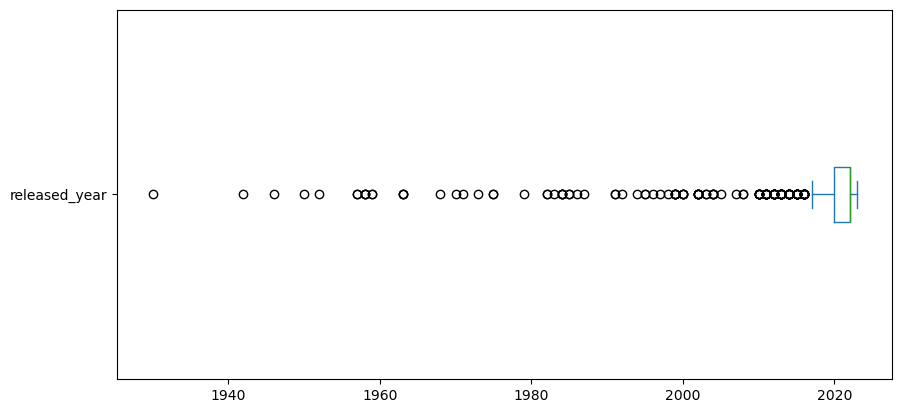

In [416]:
#In order to show the data graph for the released years of the data set we use boxplot in order to see any outliers outside of the mean 
plt.figure().set_figwidth(10)
clean['released_year'].plot.box(vert=False)
plt.show()

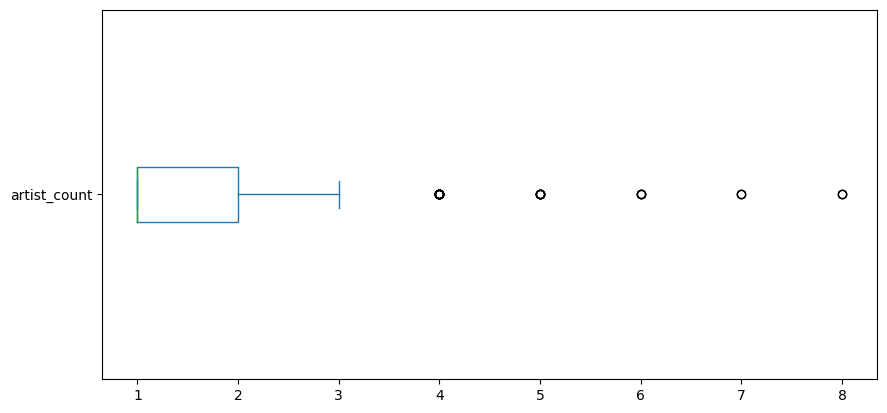

In [418]:
#In order to show the data graph for the artists that have made multiple hitsongs, we use boxplot in order to see any outliers outside of the mean 
plt.figure().set_figwidth(10)
clean['artist_count'].plot.box(vert=False)
plt.show()

### Top Performers


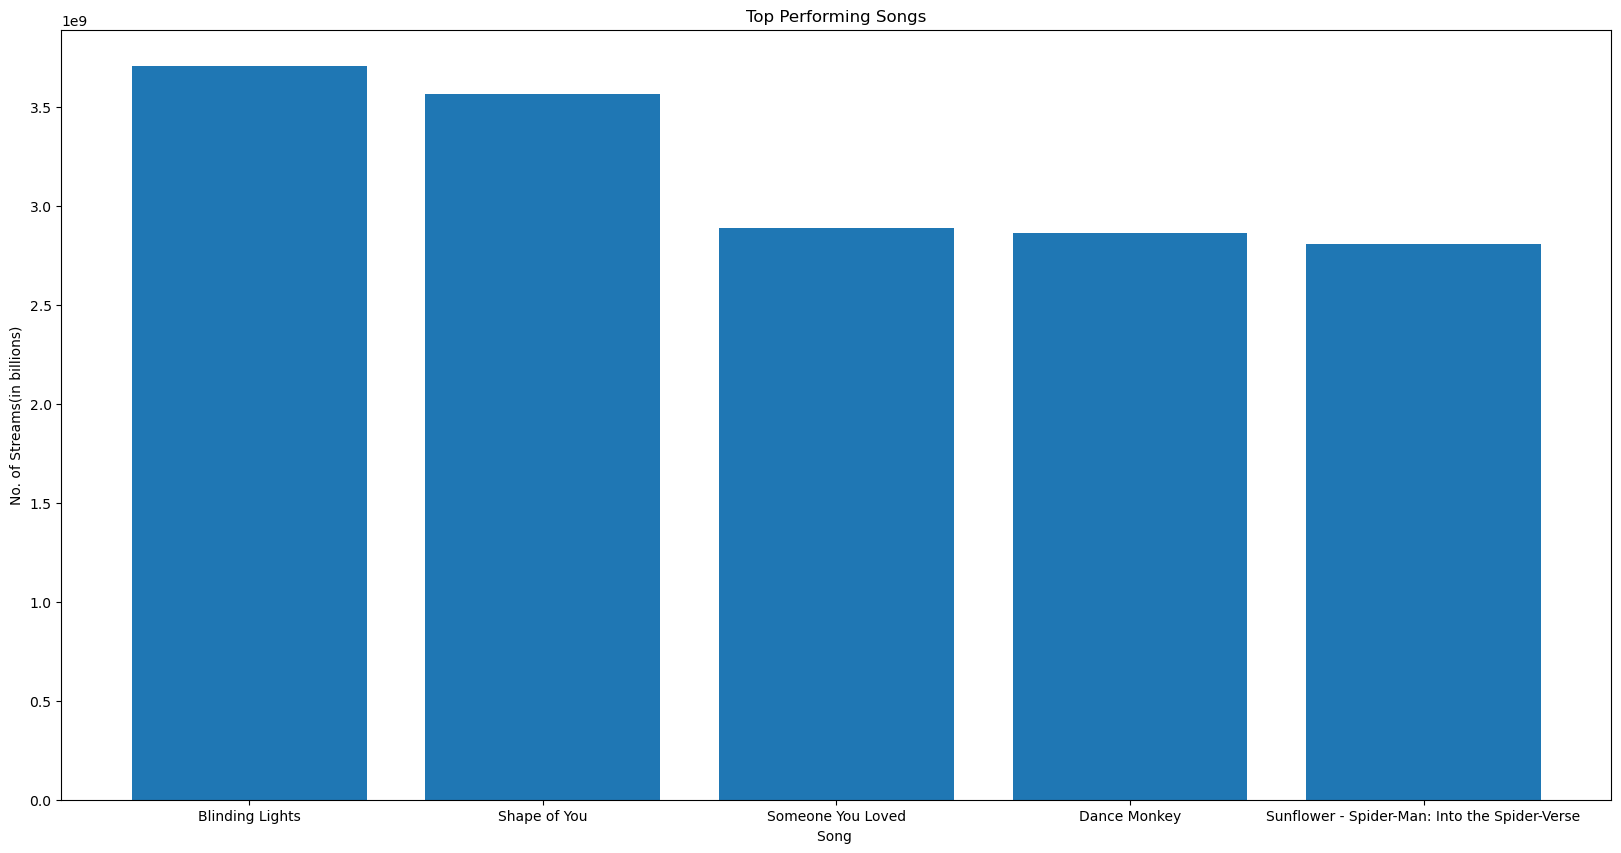

In [421]:
#Which track has the highest number of streams? Display the top 5 most streamed tracks
x = clean["track_name"].head(5)
y = clean["streams"].head(5)

plt.figure(figsize=(20,10))
plt.bar(x,y)

plt.xlabel("Song ")
plt.ylabel("No. of Streams(in billions)")
plt.title("Top Performing Songs")
plt.show()

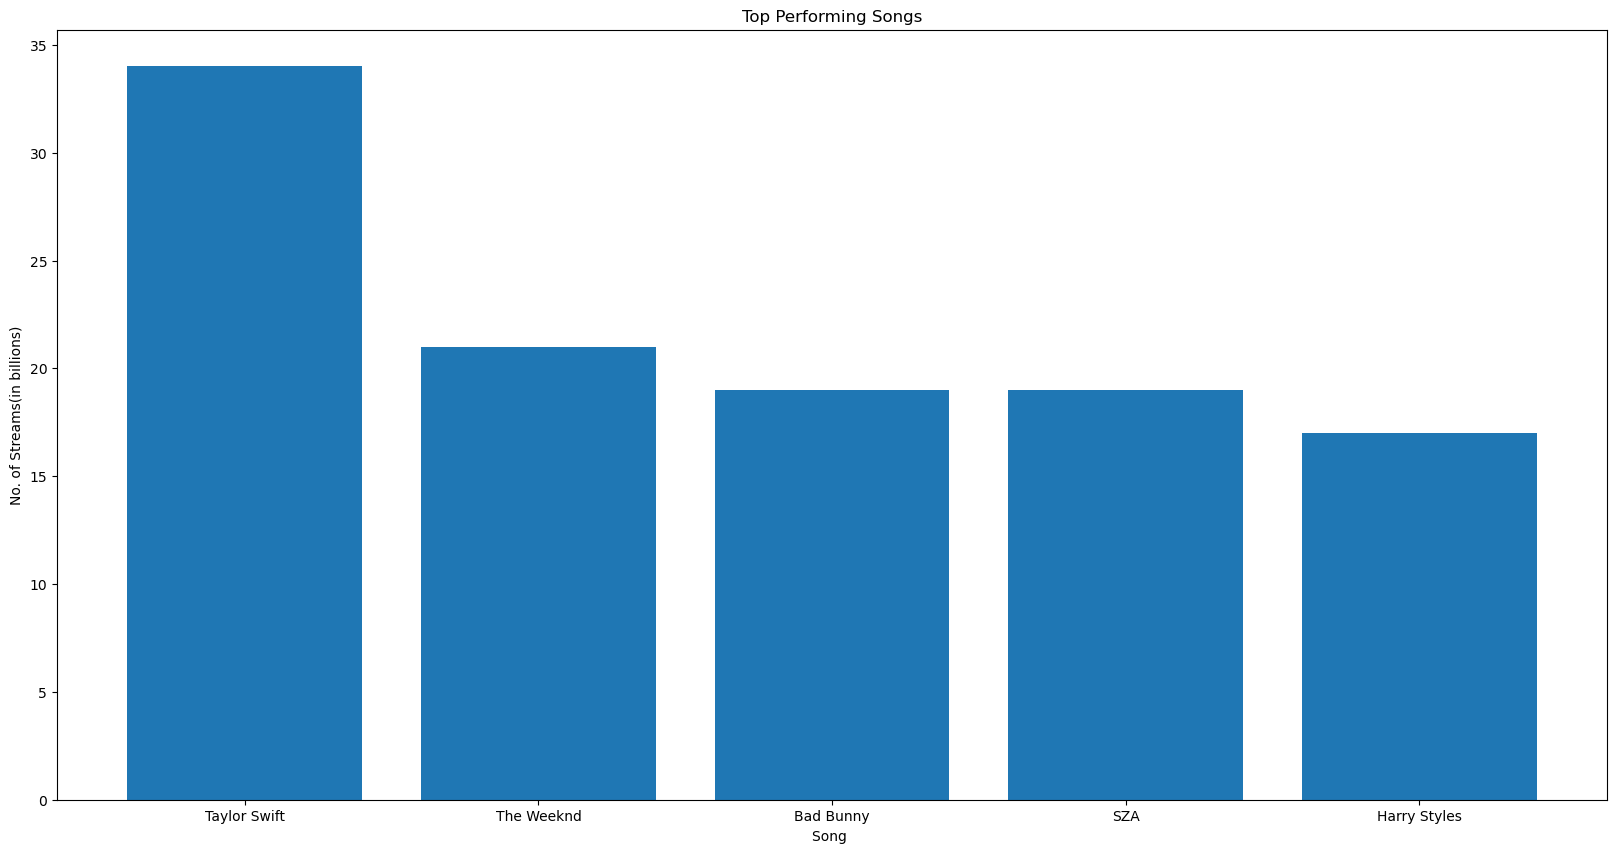

In [531]:
#Portraying the top 5 most frequent artists based on the number of tracks that can be found in the dataset
n = 5

x = clean['artist(s)_name'].value_counts()[:n].index.tolist()
y = clean['artist(s)_name'].value_counts().head()

plt.figure(figsize=(20,10))
plt.bar(x,y)

plt.xlabel("Song ")
plt.ylabel("No. of Streams(in billions)")
plt.title("Top Performing Songs")
plt.show()

## Temporal Trends

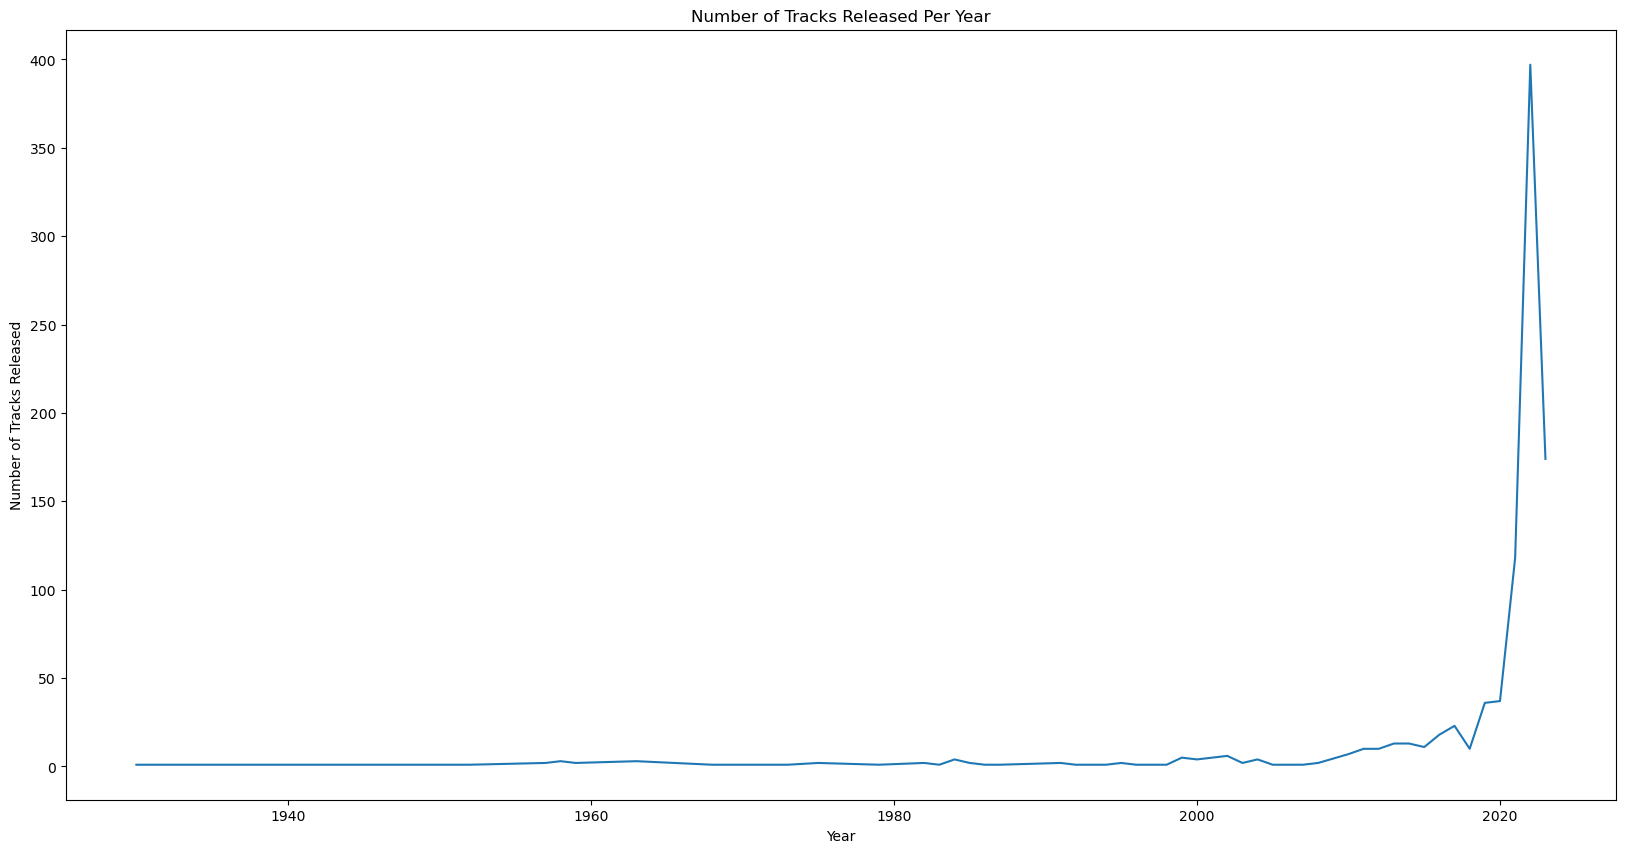

In [539]:
#We put the values of the tracks when they were released in correlation to the year they were made
tracks_per_year = clean['released_year'].value_counts().sort_index()

#Extract x (years) and y (number of tracks released per year) values
x = tracks_per_year.index
y = tracks_per_year.values

#Plot the data
plt.figure(figsize=(20,10))
plt.plot(x, y)
plt.xlabel("Year")
plt.ylabel("Number of Tracks Released")
plt.title("Number of Tracks Released Per Year")
plt.show()

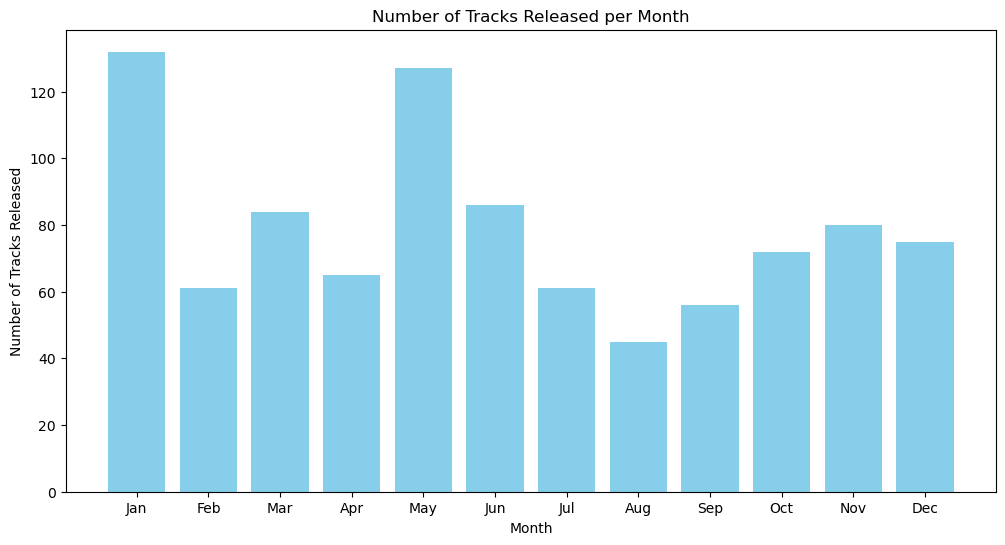

In [515]:
#In order to portray the number of released tracks in their corresponding month we use the codes below
tracks_per_month = clean['released_month'].value_counts().sort_index()

#Prepare the x and y data
x = tracks_per_month.index
y = tracks_per_month.values

#Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

#Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Tracks Released")
plt.title("Number of Tracks Released per Month")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

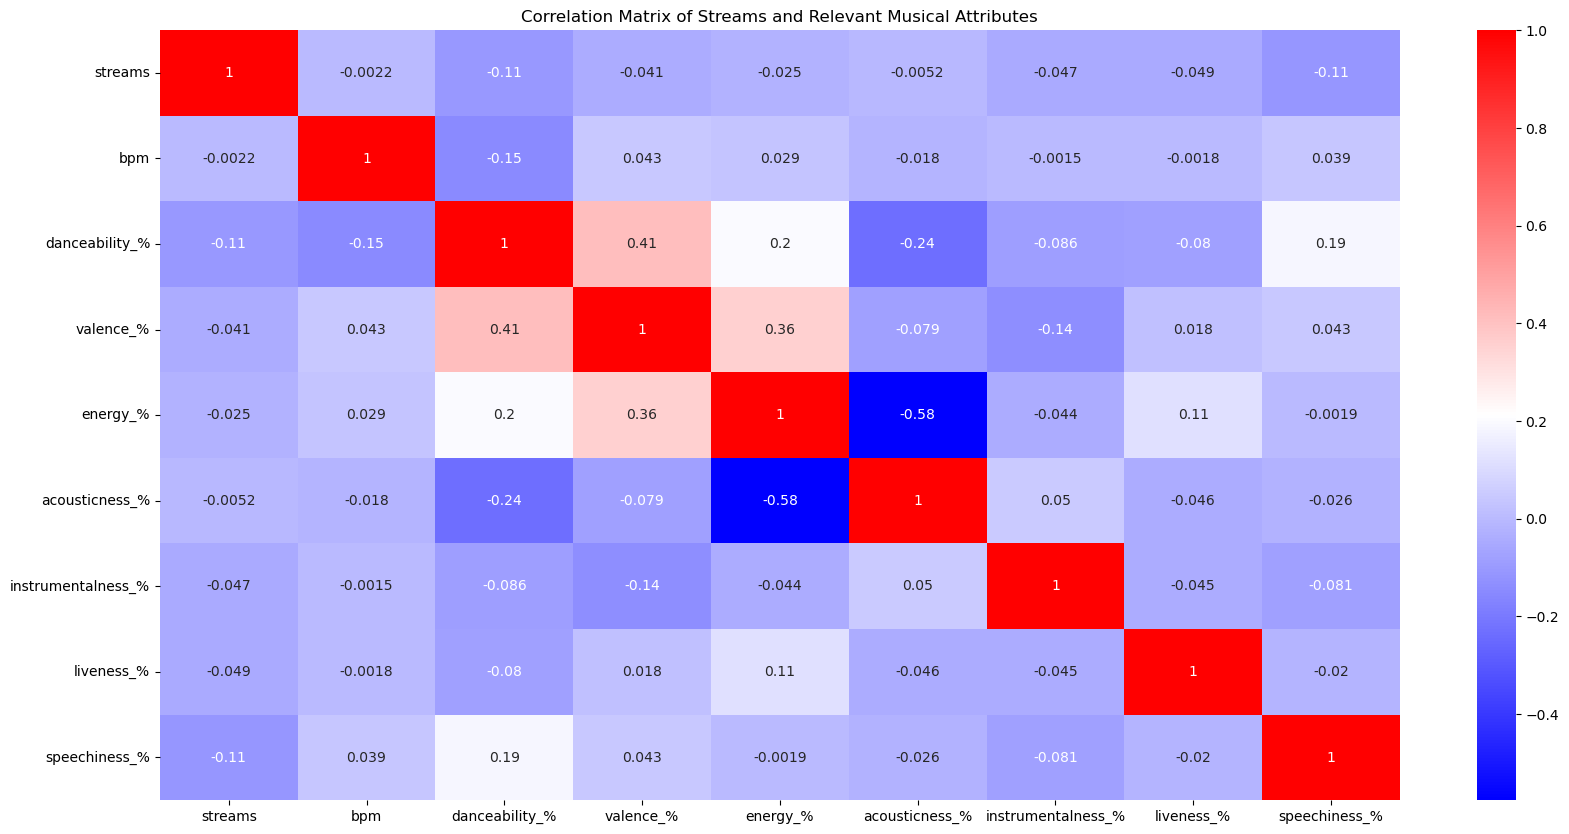

In [517]:
#Select only numerical columns
correlations = clean[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

#Plotting the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlations.corr(), annot=True, cmap="bwr")

#Adding the title of the heatmap
plt.title("Correlation Matrix of Streams and Relevant Musical Attributes")
plt.show()

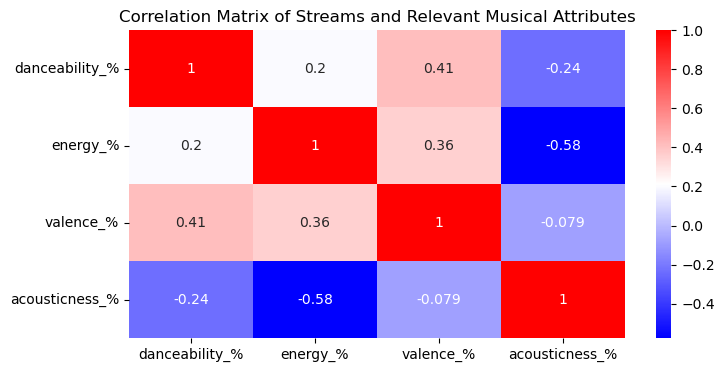

In [433]:
#Select only following columns danceability_, energy_%, valence_%, acousticness_%
dance_energy = clean[['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']]

#Plotting the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(dance_energy.corr(), annot=True, cmap="bwr")

#Adding the title of the heatmap
plt.title("Correlation Matrix of Streams and Relevant Musical Attributes")
plt.show()

Text(0.5, 1.0, 'Number of Playlists in each Platform')

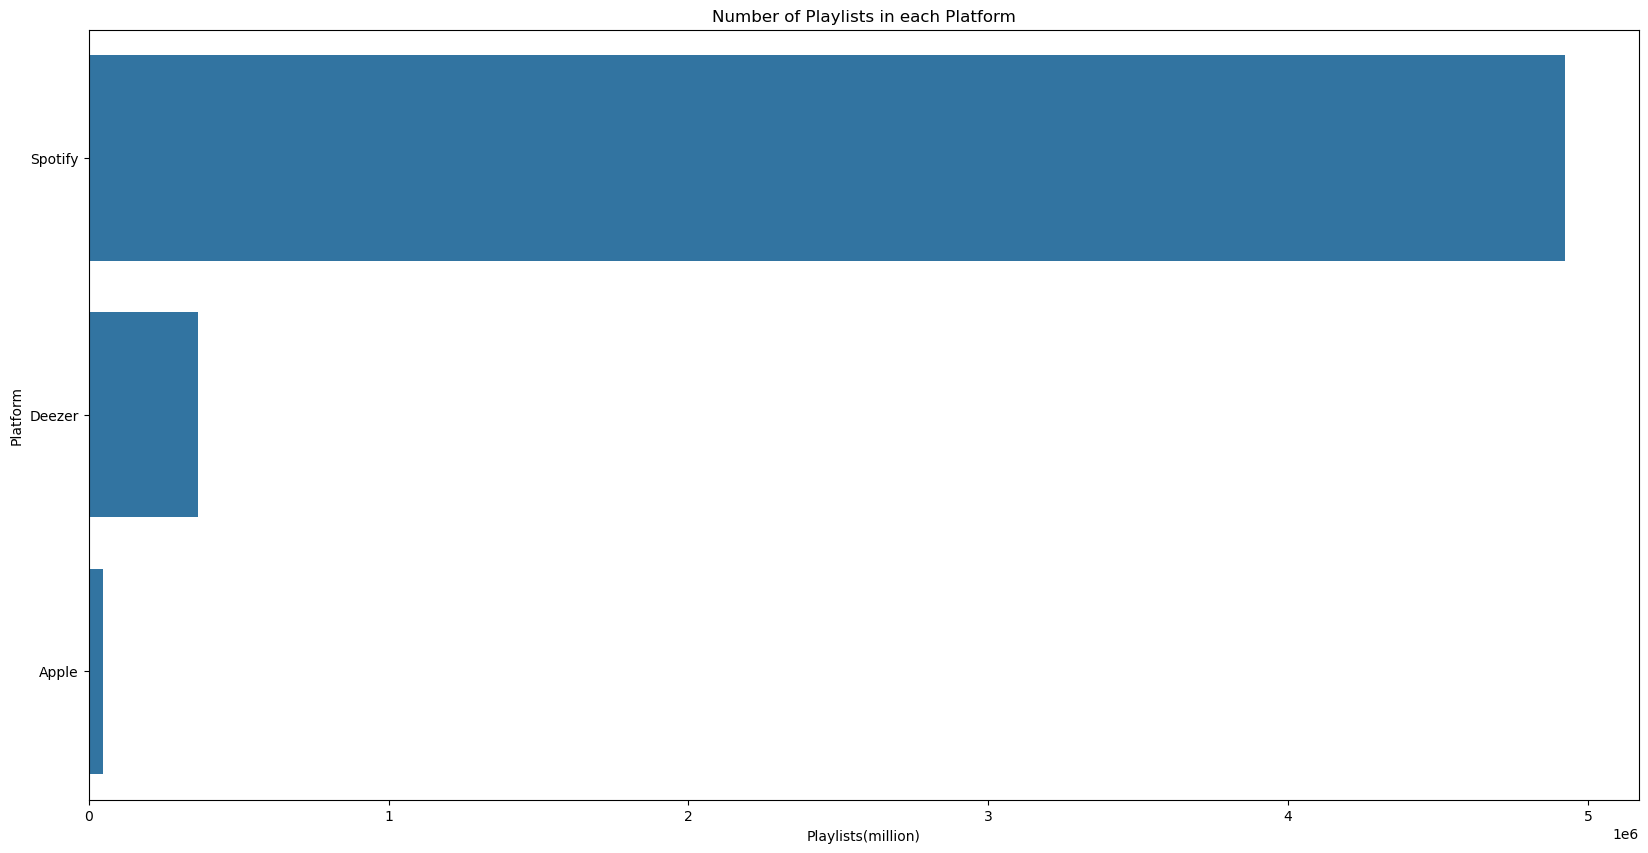

In [434]:
#In order to portray the number of playlists per platform we need to put the three platforms into one dataset to single out their corresponding datas
plt.figure(figsize=(20, 10))

platformplaylists = pd.DataFrame({'Platform': ['Spotify', 'Apple', 'Deezer'], 'Playlists(million)': [clean['in_spotify_playlists'].sum(), clean['in_apple_charts'].sum(), clean['in_deezer_playlists'].sum()]}).sort_values('Playlists(million)', ascending = False)

sns.barplot(platformplaylists,x = 'Playlists(million)', y = 'Platform', orient='h')
plt.title('Number of Playlists in each Platform')

Text(0.5, 1.0, 'Popularity chart of the The Blinding Lights on all available platform')

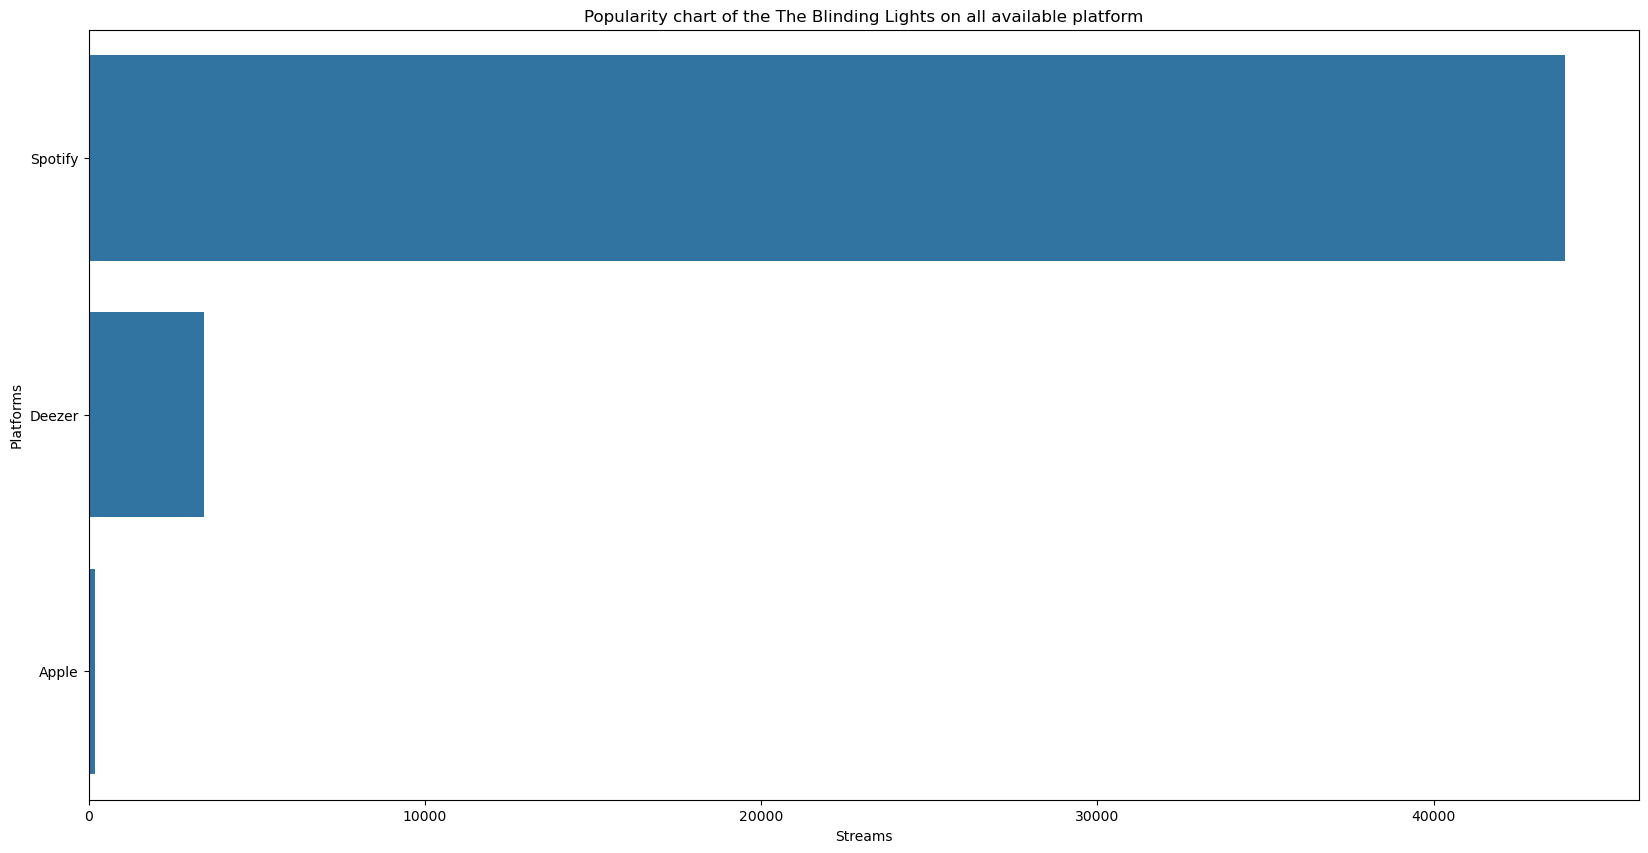

In [546]:
#We recycle the code from before and in order to single out the top streamed song we find the data at the index 0
plt.figure(figsize=(20, 10))

platformplaylists = pd.DataFrame({'Platforms': ['Spotify', 'Apple', 'Deezer'], 'Streams': [clean['in_spotify_playlists'].iloc[0], clean['in_apple_charts'].iloc[0], clean['in_deezer_playlists'].iloc[0]]}).sort_values('Streams', ascending = False)

sns.barplot(platformplaylists,x = 'Streams', y = 'Platforms', orient='h')
plt.title('Popularity chart of the The Blinding Lights on all available platform')

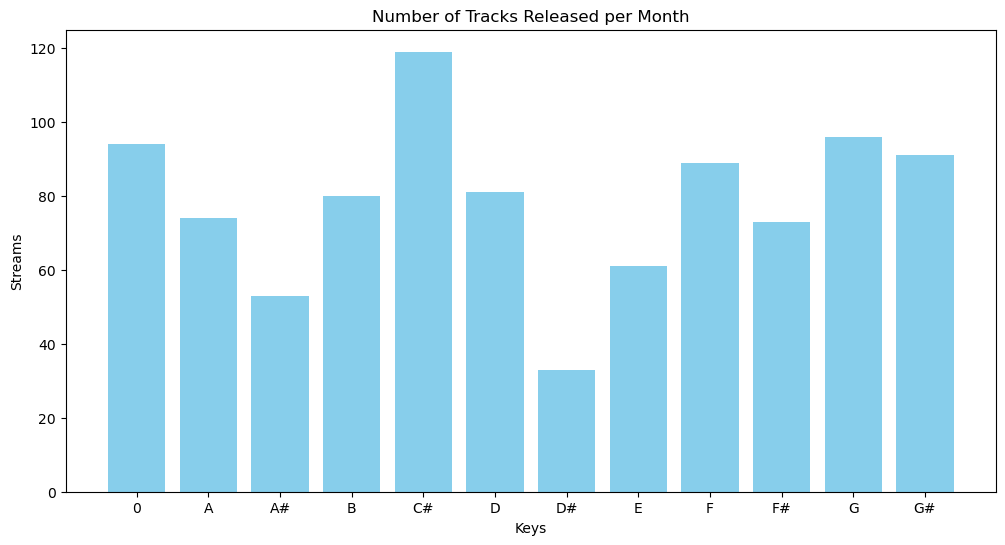

Text(0.5, 1.0, 'Number of Tracks Released per Month')

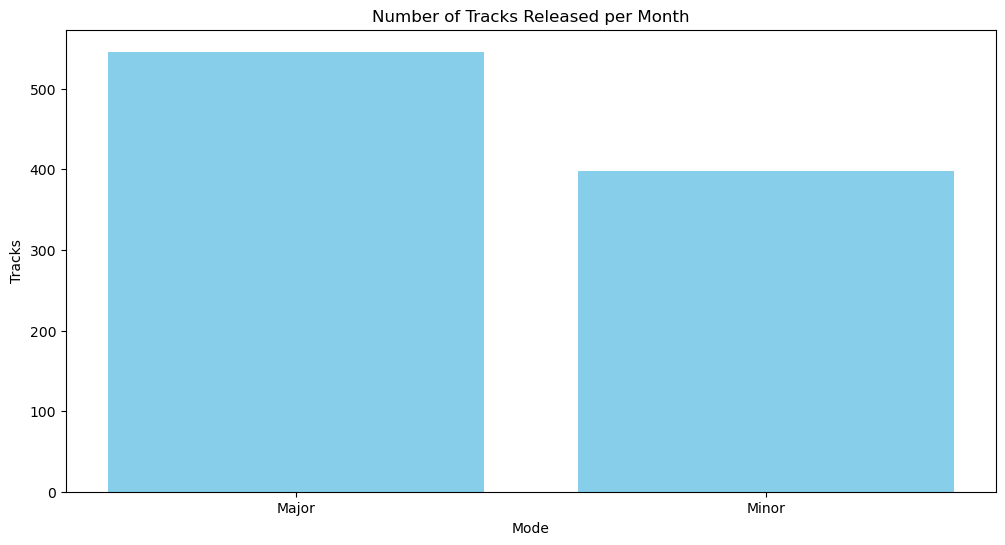

In [465]:
keys = clean['key'].value_counts().sort_index()
x = keys.index
y = keys.values

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

# Add labels and title
plt.xlabel("Keys")
plt.ylabel("Streams")
plt.title("Number of Tracks Released per Month")

plt.show()

mode = clean['mode'].value_counts().sort_index()
x = mode.index
y = mode.values

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')

# Add labels and title
plt.xlabel("Mode")
plt.ylabel("Tracks")
plt.title("Number of Tracks Released per Month")

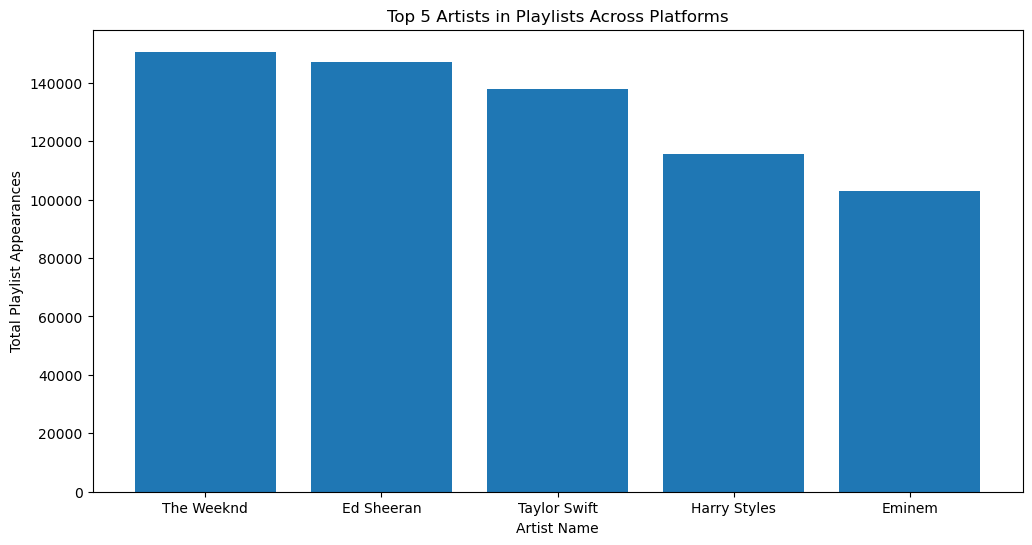

In [543]:
#Grouping data by artist for appearances in playlists
playlist_counts = clean.groupby('artist(s)_name')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum().sum(axis=1).sort_values(ascending=False)

#Getting the top 5 artists for each metric
top_playlist_artists = playlist_counts.head(5)

#Plotting top artists in playlists
plt.figure(figsize=(12, 6))
x = top_playlist_artists.index
y = top_playlist_artists.values
plt.bar(x, y)
plt.xlabel("Artist Name")
plt.ylabel("Total Playlist Appearances")
plt.title("Top 5 Artists in Playlists Across Platforms")
plt.show()



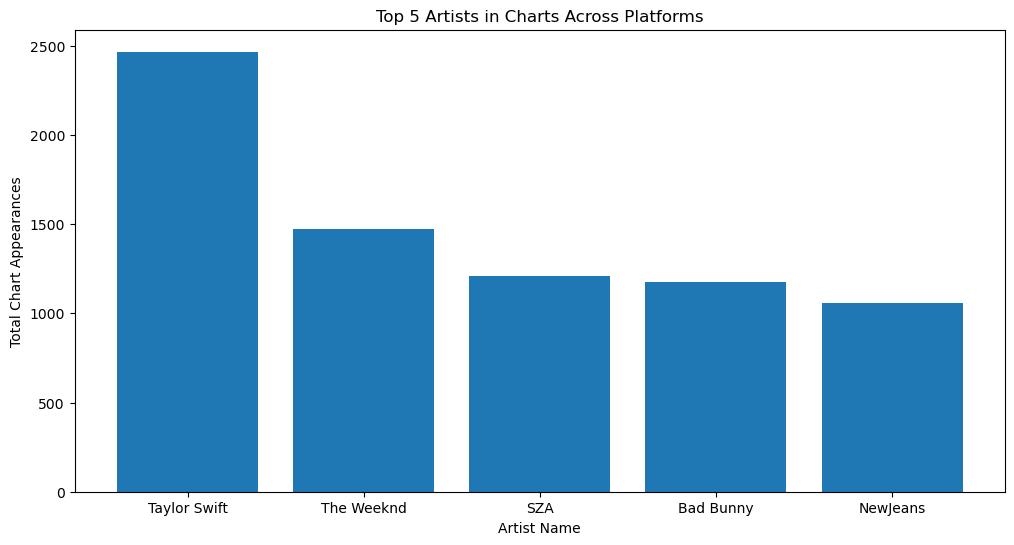

In [541]:
#Grouping data by artist for appearances in charts
chart_counts = clean.groupby('artist(s)_name')[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']].sum().sum(axis=1).sort_values(ascending=False)

top_chart_artists = chart_counts.head()

#Plotting top artists in charts
plt.figure(figsize=(12, 6))
x = top_chart_artists.index
y = top_chart_artists.values
plt.bar(x, y)
plt.xlabel("Artist Name")
plt.ylabel("Total Chart Appearances")
plt.title("Top 5 Artists in Charts Across Platforms")
plt.show()